<a href="https://colab.research.google.com/github/zhensongren/learn-ml/blob/master/gp_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')


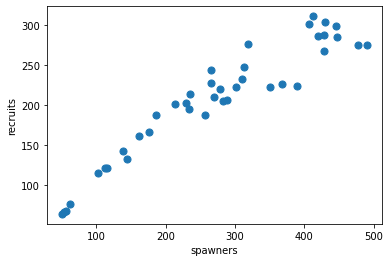

In [4]:
salmon_data = pd.read_table('./sample_data/salmon.txt', sep='\s+', index_col=0)
salmon_data.plot.scatter(x='spawners', y='recruits', s=50);

In [5]:
x, y = salmon_data[['spawners', 'recruits']].values.T
x

array([ 56,  62, 445, 279, 138, 428, 319, 102,  51, 289, 351, 282, 310,
       266, 256, 144, 447, 186, 389, 113, 412, 176, 313, 162, 368,  54,
       214, 429, 115, 407, 265, 301, 234, 229, 270, 478, 419, 490, 430,
       235])

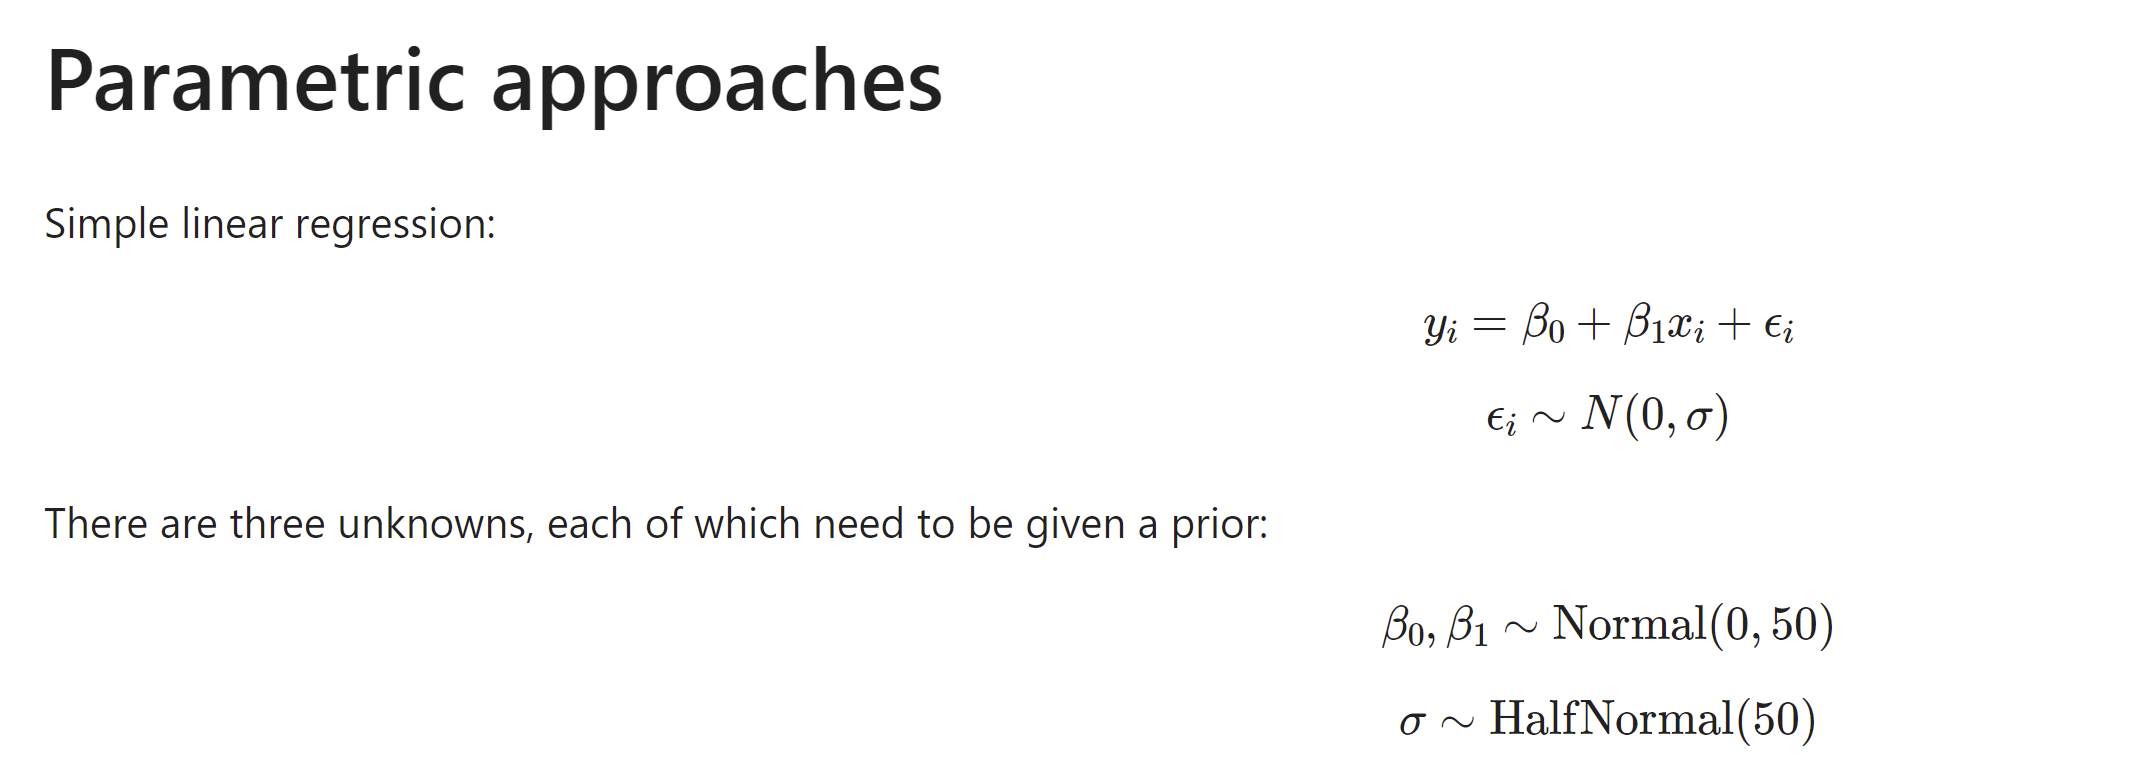

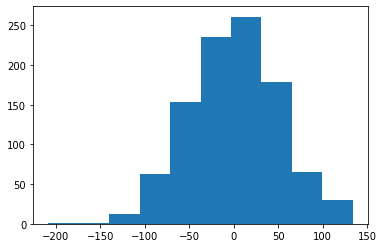

In [6]:
a_normal_distribution = pm.Normal.dist(mu=0, sigma=50)
plt.hist(a_normal_distribution.random(size=1000));

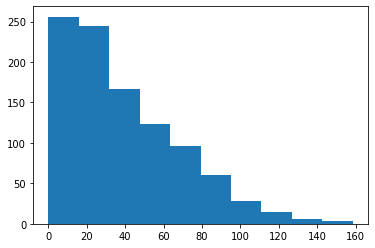

In [7]:
a_half_normal_distribution = pm.HalfNormal.dist(sigma=50)
plt.hist(a_half_normal_distribution.random(size=1000));


In [8]:
with pm.Model() as linear_salmon_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=2)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x
    
    recruits = pm.Normal('recruits', mu=μ, sigma=σ, observed=y)

In [9]:
with linear_salmon_model:
    
    linear_trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 7 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


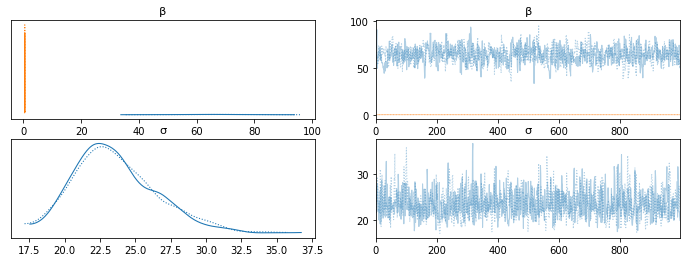

In [10]:
az.plot_trace(linear_trace);

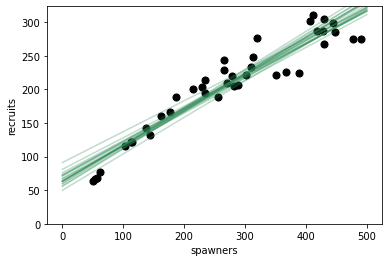

In [11]:
X_pred = np.linspace(0, 500, 100)

ax = salmon_data.plot.scatter(x='spawners', y='recruits', c='k', s=50)
ax.set_ylim(0, None)
for b0,b1 in linear_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred, alpha=0.3, color='seagreen');


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 29 seconds.
The number of effective samples is smaller than 25% for some parameters.


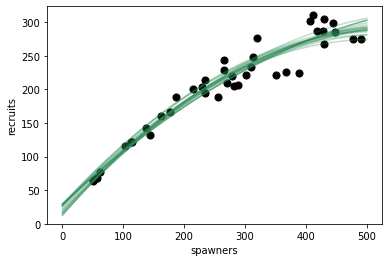

In [12]:
with pm.Model() as quad_salmon_model:
    
    β = pm.Normal('β', mu=0, sigma=50, shape=3)
    σ = pm.HalfNormal('σ', sigma=50)
    
    μ = β[0] + β[1] * x + β[2] * x**2
    
    recruits = pm.Normal('recruits', mu=μ, sigma=σ, observed=y)
with quad_salmon_model:
    
    quad_trace = pm.sample(1000, tune=2000, cores=2, random_seed=1)
ax = salmon_data.plot.scatter(x='spawners', y='recruits', c='k', s=50)
ax.set_ylim(0, None)
for b0,b1,b2 in quad_trace['β'][:20]:
    ax.plot(X_pred, b0 + b1*X_pred + b2*X_pred**2, alpha=0.3, color='seagreen');


# New Section